<a href="https://www.kaggle.com/code/shubhamgupta012/eda-on-iit-admission-dataset?scriptVersionId=133320973" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iit-admissions-dataset/student_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/iit-admissions-dataset/student_data.csv')
df.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [3]:
df.shape

(200000, 10)

In [4]:
df.describe()

,Student ID,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,549367.492925,2018.997685,2019.995235,2.499020,125092.847595,12484.258575
std,259361.565011,2.002381,1.997744,1.117804,43287.894903,8788.362629
min,100001.000000,2016.000000,2017.000000,1.000000,50000.000000,0.000000
25%,325311.000000,2017.000000,2018.000000,1.000000,87641.500000,5383.000000
50%,548855.500000,2019.000000,2020.000000,2.000000,125221.000000,10792.500000
75%,774182.500000,2021.000000,2022.000000,3.000000,162597.250000,18154.000000
max,999997.000000,2022.000000,2023.000000,4.000000,200000.000000,39865.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Date of Birth                200000 non-null  object
 3   Field of Study               200000 non-null  object
 4   Year of Admission            200000 non-null  int64 
 5   Expected Year of Graduation  200000 non-null  int64 
 6   Current Semester             200000 non-null  int64 
 7   Specialization               200000 non-null  object
 8   Fees                         200000 non-null  int64 
 9   Discount on Fees             200000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.3+ MB


In [6]:
df.dtypes

Student ID                      int64
Student Name                   object
Date of Birth                  object
Field of Study                 object
Year of Admission               int64
Expected Year of Graduation     int64
Current Semester                int64
Specialization                 object
Fees                            int64
Discount on Fees                int64
dtype: object

In [7]:
df.isnull().sum()

Student ID                     0
Student Name                   0
Date of Birth                  0
Field of Study                 0
Year of Admission              0
Expected Year of Graduation    0
Current Semester               0
Specialization                 0
Fees                           0
Discount on Fees               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Field of Study'].value_counts()

Electrical Engineering    40305
Chemical Engineering      40020
Computer Science          39960
Mechanical Engineering    39941
Civil Engineering         39774
Name: Field of Study, dtype: int64

In [10]:
df['Specialization'].value_counts()

Web Development            40292
Machine Learning           40142
Network Security           39932
Data Science               39870
Artificial Intelligence    39764
Name: Specialization, dtype: int64

In [11]:
df['Expected Year of Graduation'].value_counts()

2021    28705
2019    28658
2020    28616
2018    28613
2017    28590
2022    28458
2023    28360
Name: Expected Year of Graduation, dtype: int64

In [12]:
df['Year of Admission'].value_counts()

2017    28760
2022    28703
2016    28646
2019    28618
2021    28483
2018    28435
2020    28355
Name: Year of Admission, dtype: int64

<Axes: ylabel='Field of Study'>

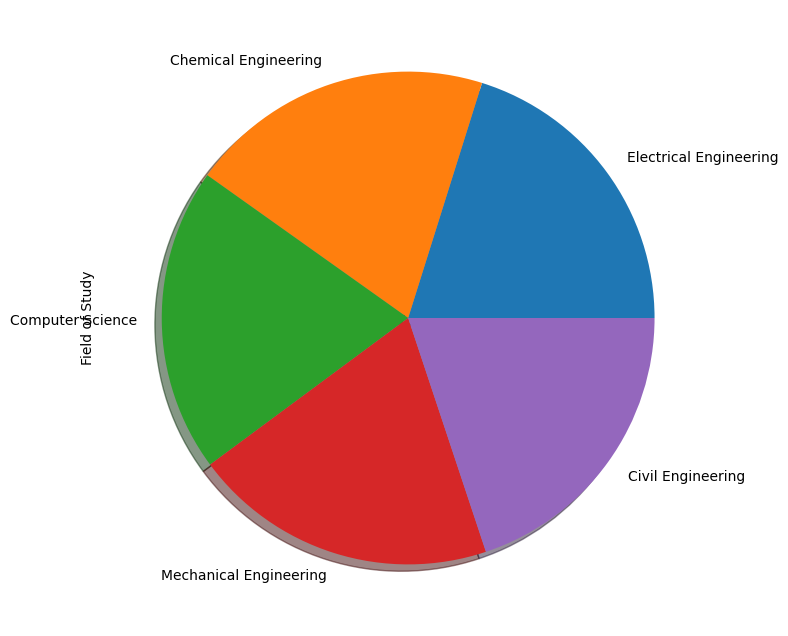

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
df['Field of Study'].value_counts().plot.pie(shadow=True)

<Axes: ylabel='Specialization'>

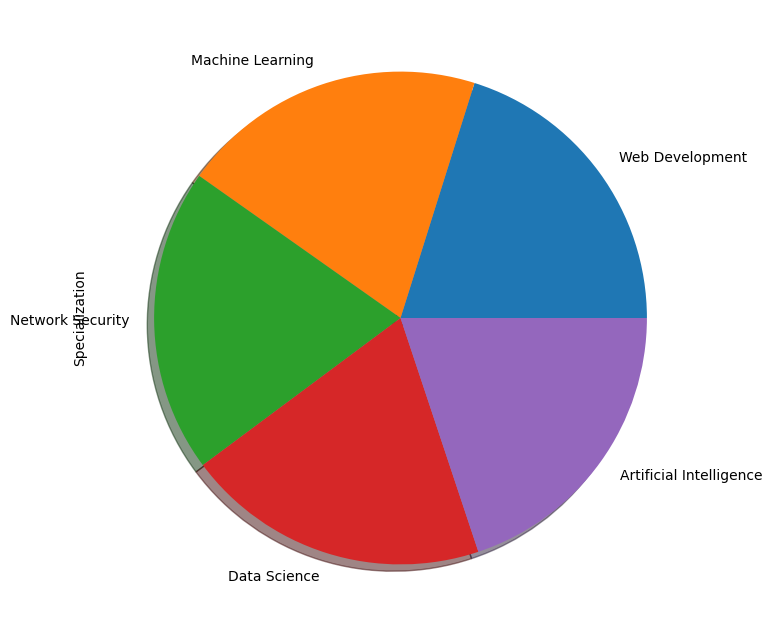

In [14]:
plt.figure(figsize=(20,8))
df['Specialization'].value_counts().plot.pie(shadow=True)

(array([40292.,     0., 40142.,     0.,     0., 39932.,     0., 39870.,
            0., 39764.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

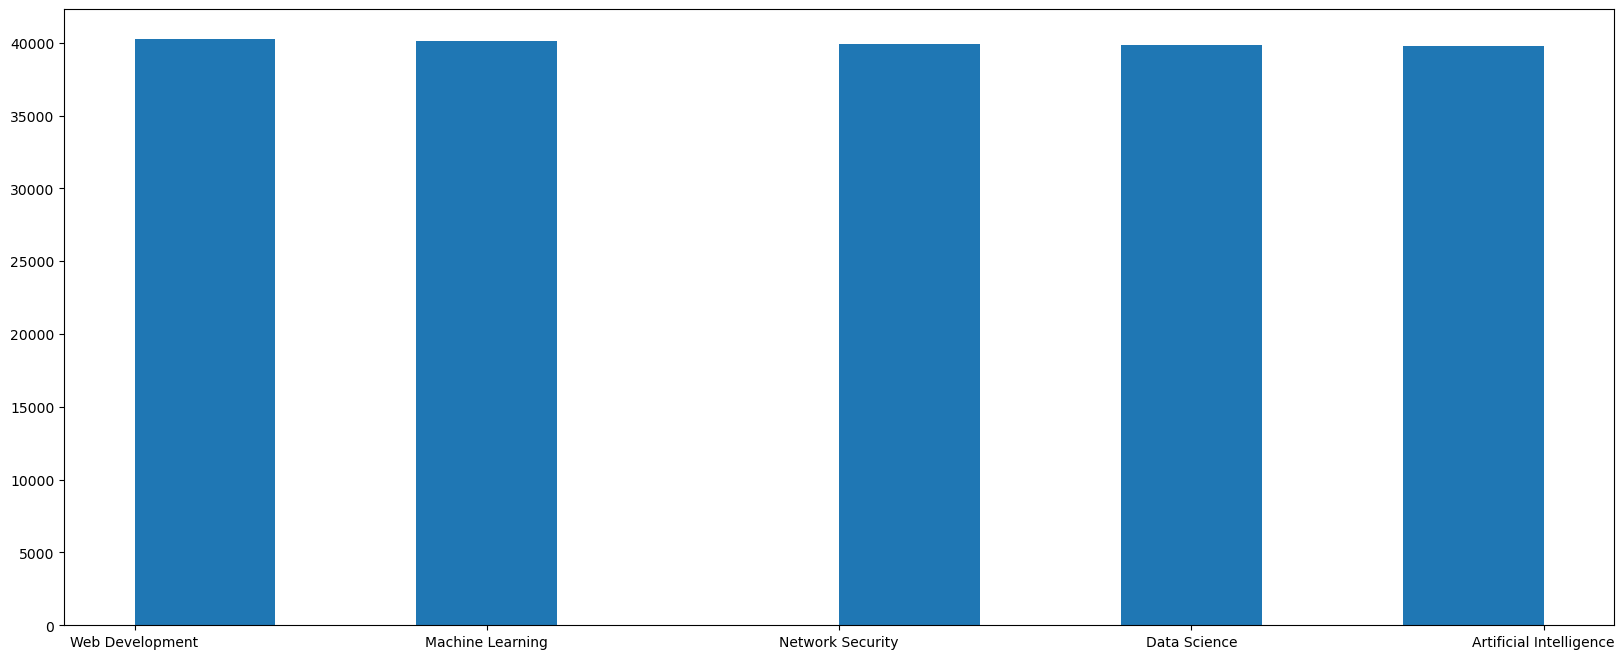

In [15]:
plt.figure(figsize=(20,8))
plt.hist(df['Specialization'])

(array([39960.,     0., 39941.,     0.,     0., 39774.,     0., 40020.,
            0., 40305.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

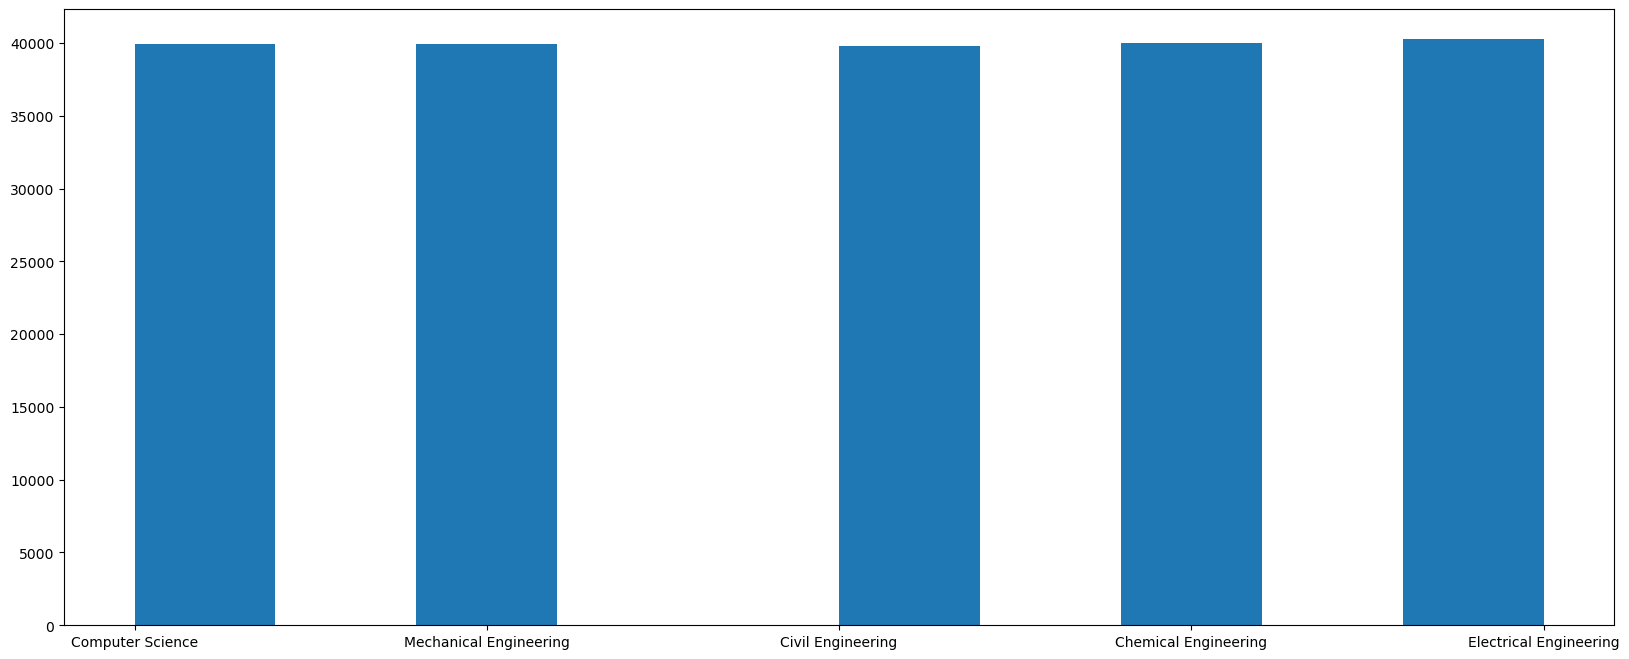

In [16]:
plt.figure(figsize=(20,8))
plt.hist(df['Field of Study'])

In [17]:
df['Discount_percent'] = df['Discount on Fees']/df['Fees'] * 100

In [18]:
df.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Discount_percent
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572,12.614726
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760,9.349465
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871,10.547591
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284,12.807232
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871,11.808566


In [19]:
df['Discount_percent'].describe()

count    200000.000000
mean          9.983395
std           5.782674
min           0.000000
25%           4.966064
50%           9.971313
75%          14.991160
max          20.000000
Name: Discount_percent, dtype: float64

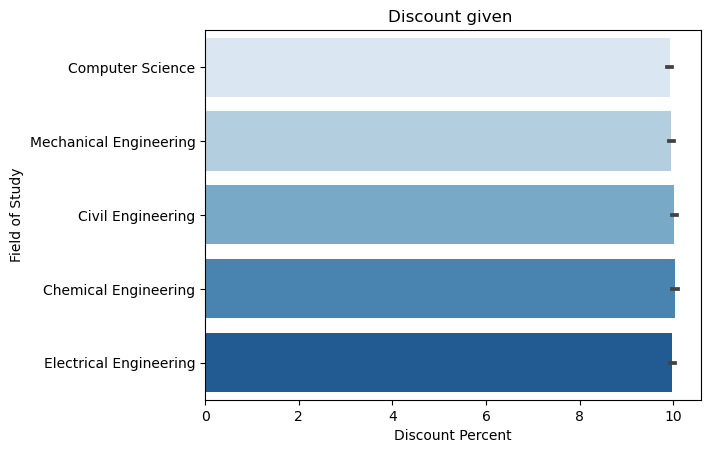

In [20]:
sns.barplot(x = 'Discount_percent',y = 'Field of Study',data = df,palette = "Blues")
plt.title('Discount given ')
plt.xlabel('Discount Percent')
plt.ylabel('Field of Study')
plt.show()

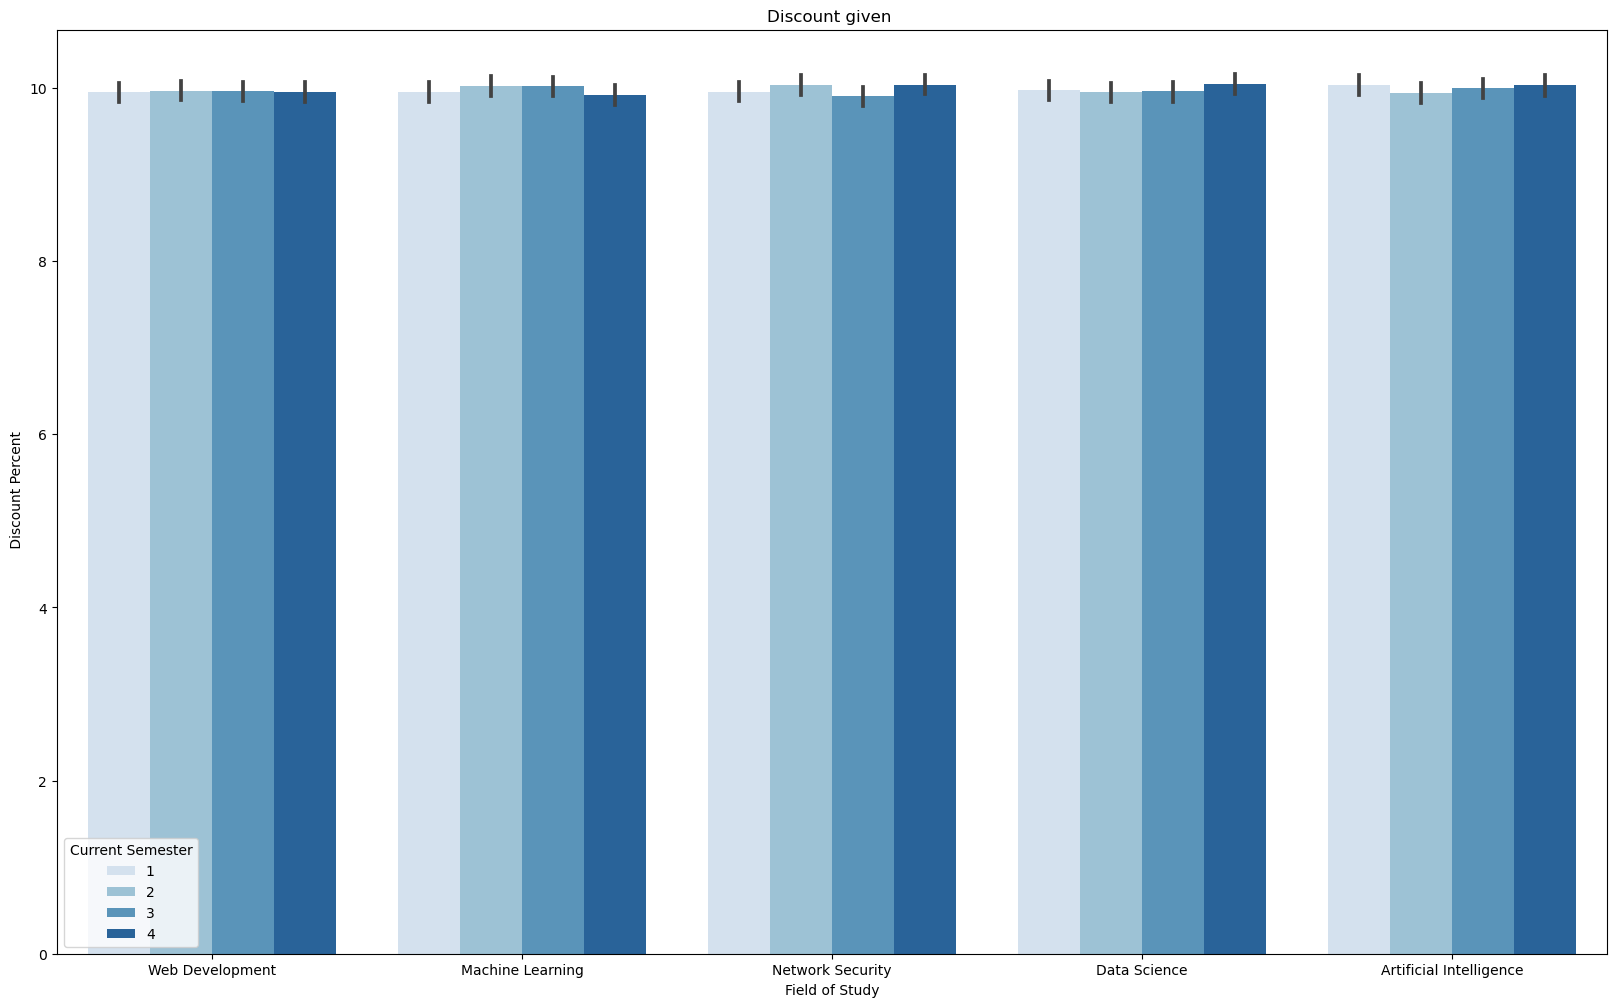

In [21]:
plt.figure(figsize=(20,12))
sns.barplot(x = 'Specialization',y = 'Discount_percent',hue='Current Semester',data = df,palette = "Blues")
plt.title('Discount given ')
plt.xlabel('Field of Study')
plt.ylabel(' Discount Percent')
# plt.legend()
plt.show()

<Axes: xlabel='Expected Year of Graduation', ylabel='Discount_percent'>

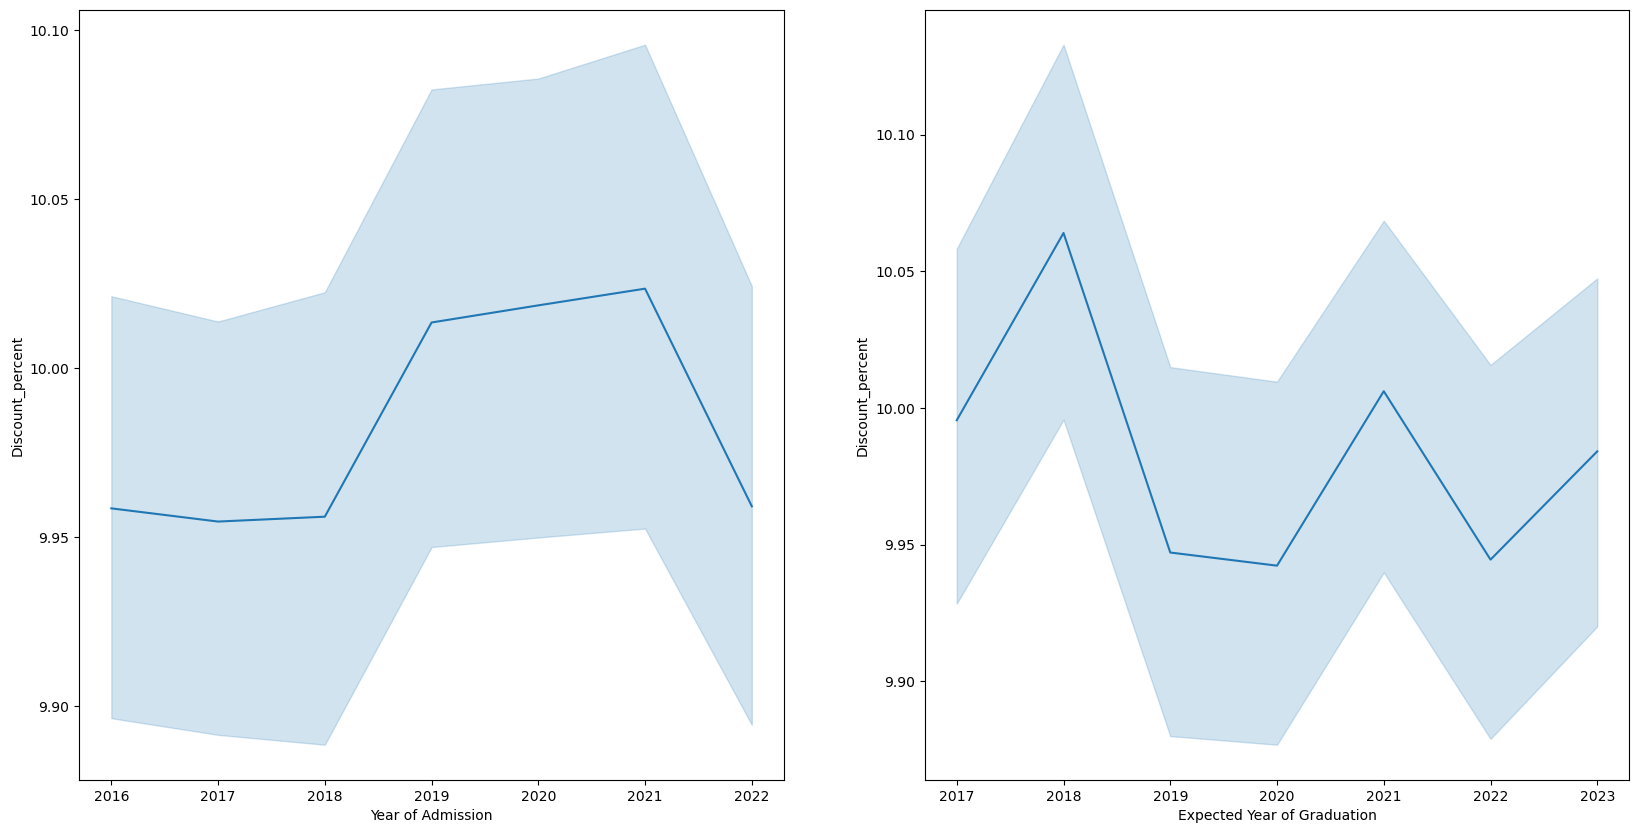

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'Year of Admission',y='Discount_percent',data=df)
plt.subplot(1, 2, 2)
sns.lineplot(x = 'Expected Year of Graduation',y='Discount_percent',data=df)

<Axes: xlabel='Expected Year of Graduation', ylabel='Fees'>

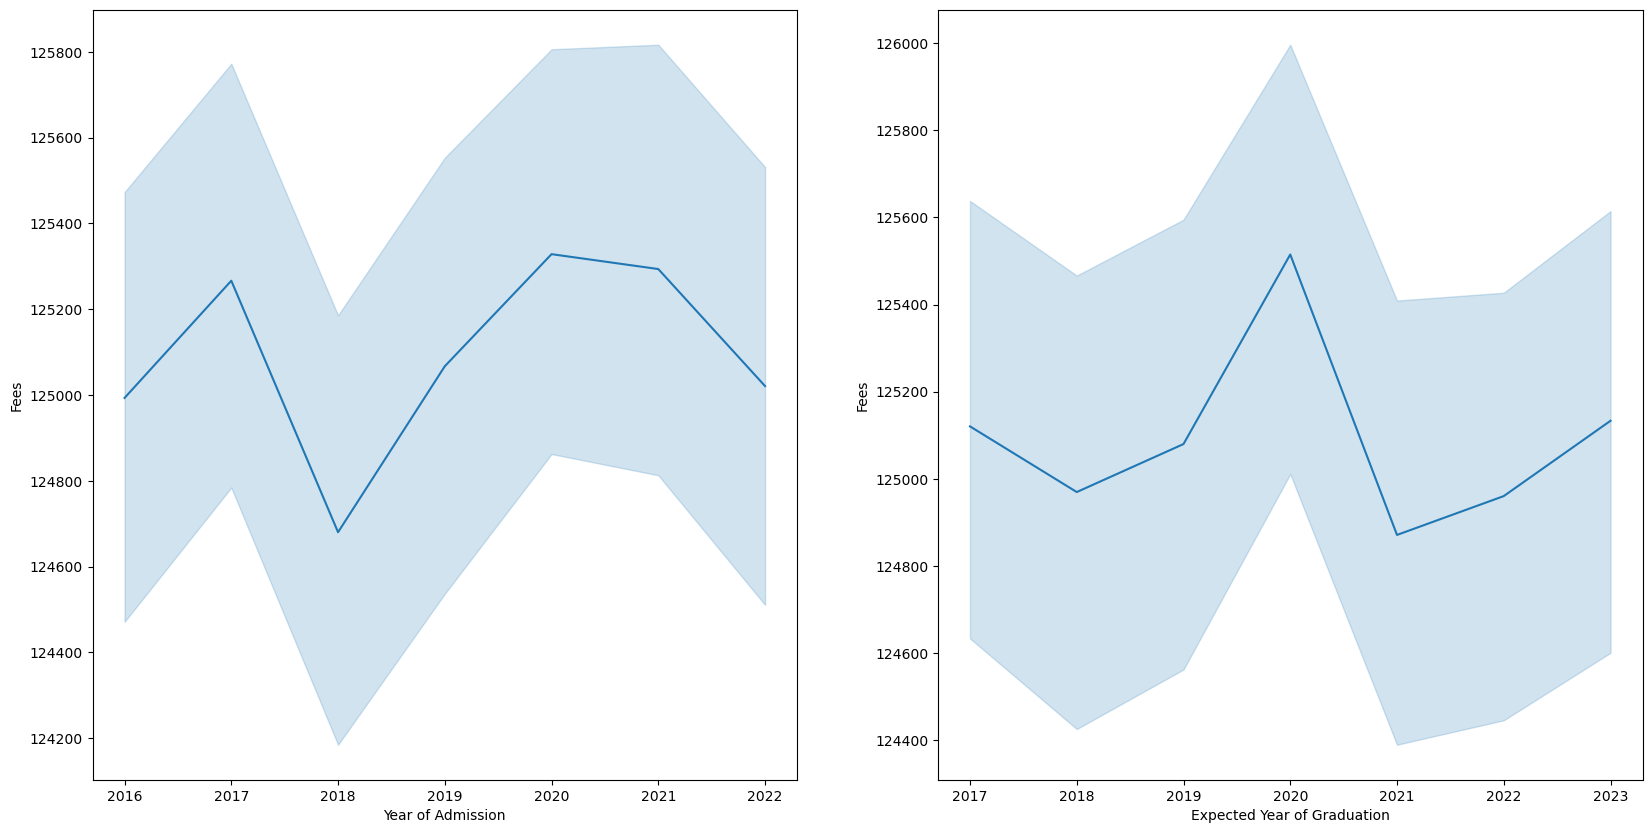

In [23]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.lineplot(x = 'Year of Admission',y='Fees',data=df)
plt.subplot(1,2,2)
sns.lineplot(x = 'Expected Year of Graduation',y='Fees',data=df)


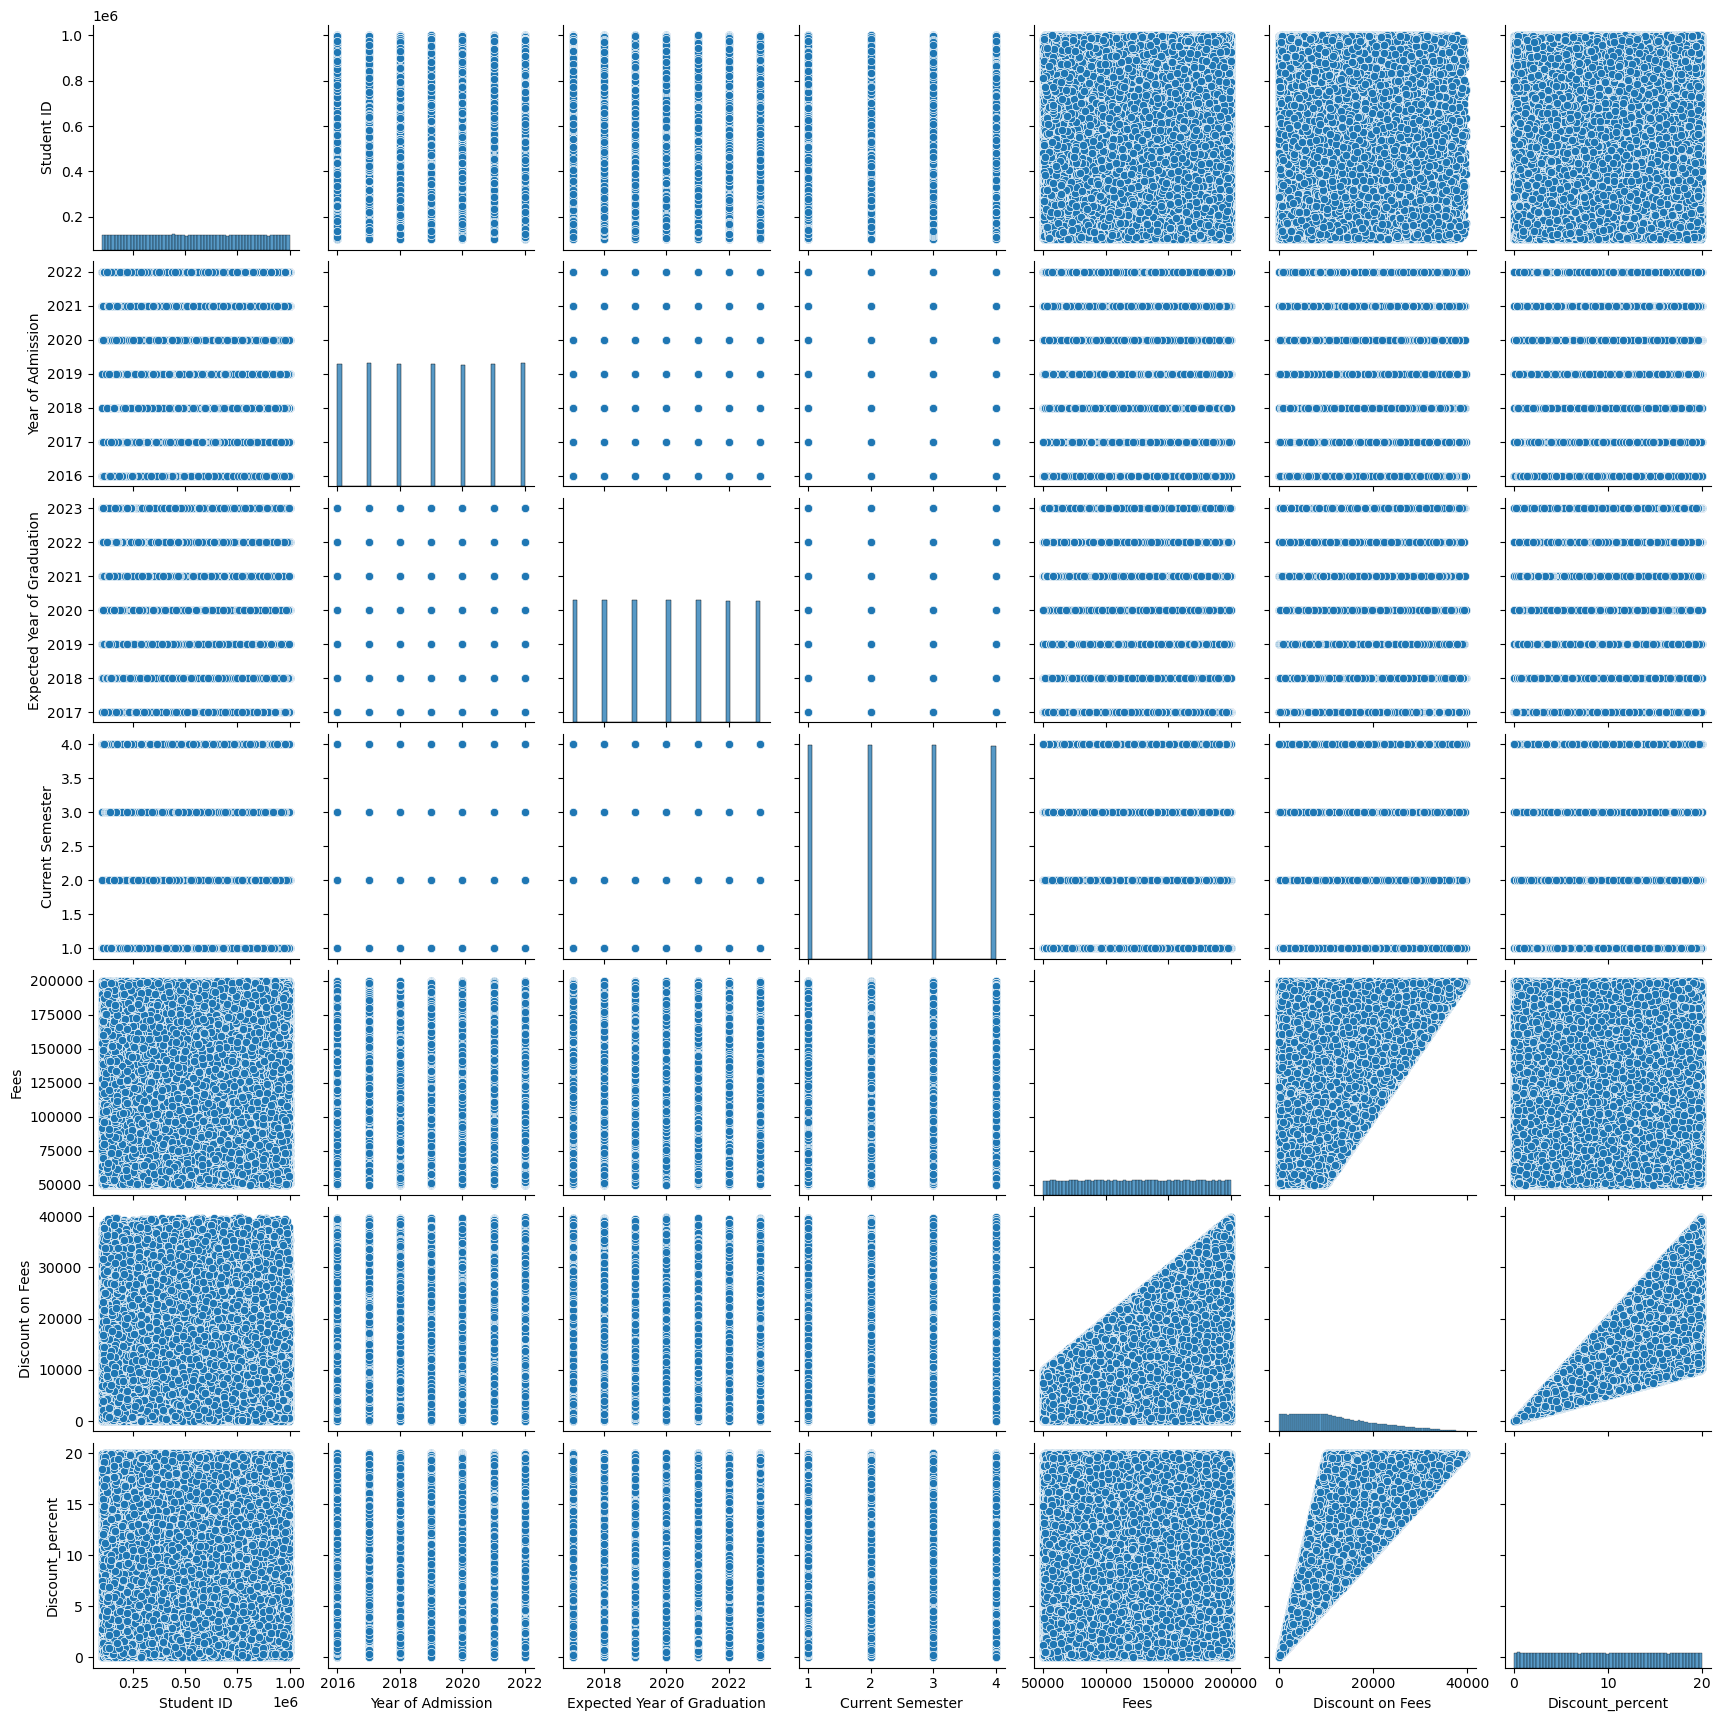

In [24]:
sns.pairplot(df)

In [25]:
# plt.figure(figsize=(20,8))
# plt.plot(df[df['Field of Study']== 'Computer Science'],df['Discount_percent'])